# SuperMarket Analysis

### It's a datset which i got from Kaggle, going to clean it and do the basic visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\DS\DataSets\supermarket\supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Invoice ID, Time is not needed so dropping that column
df.drop(columns = ['Time','Invoice ID'], inplace = True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Converting the Number columns
df['Unit price'] = df['Unit price'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)
df['Tax 5%'] = df['Tax 5%'].astype(float)
df['cogs'] = df['cogs'].astype(float)
df['gross margin percentage'] = df['gross margin percentage'].astype(float)
df['gross income'] = df['gross income'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int32  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [8]:
# writing the function to convert the date in the correct format
def datecorrect(date):
    ls1 = date.split('/')
    return '-'.join(ls1)

In [9]:
df['Date'] = df['Date'].apply(datecorrect)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1-27-2019,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
#Extracting the year and month from the date column after converting it into date datatype
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.drop(columns = 'Date', inplace = True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019,2


#### as i have done the required cleaning, plotting the cleaned data
# Plotting

In [11]:
df_income = df.groupby('Branch').sum('gross income')
df_income.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month
Branch,,,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,686460,688
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,670308,665
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,662232,640


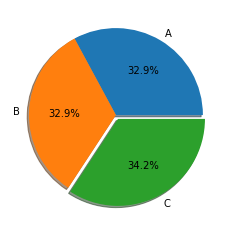

In [12]:
plt.pie(df_income['gross income'], 
        labels = df_income.index, 
        autopct = '%1.1f%%', 
        shadow = True,
        explode = [0,0,0.05])
plt.show()

In [13]:
df_income = df.groupby(['Month','Branch']).sum('gross income')
df_income.head()

Unit price  Quantity     Tax 5%       Total      cogs  \
Month Branch                                                          
1     A          6349.53       685  1841.9585  38681.1285  36839.17   
      B          6544.41       600  1770.2885  37176.0585  35405.77   
      C          6859.95       680  1925.4610  40434.6810  38509.22   
2     A          5430.93       493  1421.9105  29860.1205  28438.21   
      B          5919.62       624  1639.2510  34424.2710  32785.02   

              gross margin percentage  gross income  Rating    Year  
Month Branch                                                         
1     A                    566.666667     1841.9585   842.3  240261  
      B                    528.571429     1770.2885   755.0  224109  
      C                    580.952381     1925.4610   872.9  246318  
2     A                    447.619048     1421.9105   658.7  189786  
      B                    519.047619     1639.2510   763.9  220071

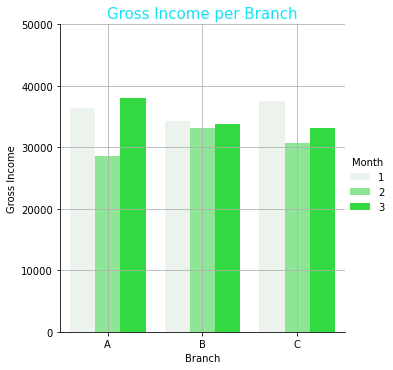

In [14]:
# Changing the multiindex for plot
data_df = df_income.reset_index().melt(id_vars = ['Month','Branch'])
sns.catplot(x = 'Branch', 
            y = 'value' ,
            hue = 'Month',
            kind = 'bar',
            color = '#16F529',
            ci = None,
            data = data_df)
plt.title('Gross Income per Branch', color = '#16E2F5', fontsize = 15)
plt.grid()
plt.ylabel('Gross Income')
plt.ylim(0,50000)
plt.show()

In [15]:
df_prod = df.groupby('Product line').sum('Quantity')
df_prod

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month
Product line,,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,343230,348
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,359382,346
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,351306,348
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,306888,312
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,323040,324
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,335154,315


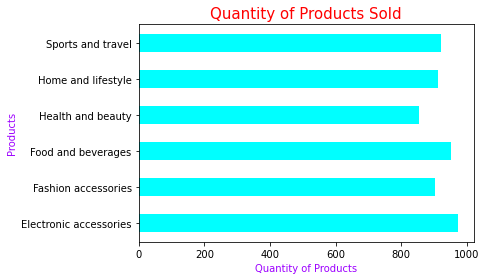

In [16]:
plt.barh(df_prod.index,
         width = df_prod['Quantity'],
        height = 0.5,
        color = '#00FFFF')
plt.title('Quantity of Products Sold', color = 'r', fontsize = 15)
plt.xlabel('Quantity of Products',color = '#9D00FF')
plt.ylabel('Products',color = '#9D00FF')
plt.show()

In [17]:
df_cust = df.groupby(['Customer type','Gender']).count()
df_cust.head()

Branch  City  Product line  Unit price  Quantity  \
Customer type Gender                                                     
Member        Female     261   261           261         261       261   
              Male       240   240           240         240       240   
Normal        Female     240   240           240         240       240   
              Male       259   259           259         259       259   

                      Tax 5%  Total  Payment  cogs  gross margin percentage  \
Customer type Gender                                                          
Member        Female     261    261      261   261                      261   
              Male       240    240      240   240                      240   
Normal        Female     240    240      240   240                      240   
              Male       259    259      259   259                      259   

                      gross income  Rating  Year  Month  
Customer type Gender                                     
Member        Female           261     261   261    261  
              Male             240     240   240    240  
Normal        Female           240     240   240    240  
              Male             259     259   259    259

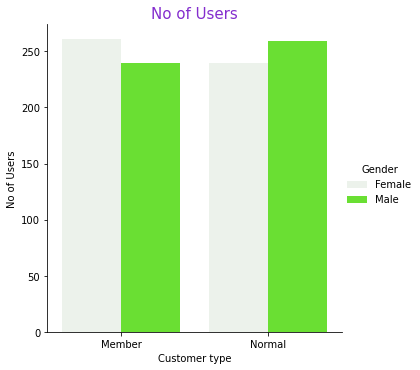

In [18]:
data_df = df_cust.reset_index().melt(id_vars = ['Customer type','Gender'])
sns.catplot(x = 'Customer type' ,
            y = 'value',
            hue = 'Gender' ,
            kind = 'bar' ,
            data = data_df,
            ci = False,
           color = '#5FFB17')
plt.ylabel('No of Users')
plt.title('No of Users', color = '#842DCE', fontsize = 15)
plt.show()

In [19]:
df_dtl = df.groupby(['Customer type','Gender','Payment']).count()
df_dtl

Branch  City  Product line  Unit price  \
Customer type Gender Payment                                               
Member        Female Cash             90    90            90          90   
                     Credit card      90    90            90          90   
                     Ewallet          81    81            81          81   
              Male   Cash             78    78            78          78   
                     Credit card      82    82            82          82   
                     Ewallet          80    80            80          80   
Normal        Female Cash             88    88            88          88   
                     Credit card      73    73            73          73   
                     Ewallet          79    79            79          79   
              Male   Cash             88    88            88          88   
                     Credit card      66    66            66          66   
                     Ewallet         105   105           105         105   

                                  Quantity  Tax 5%  Total  cogs  \
Customer type Gender Payment                                      
Member        Female Cash               90      90     90    90   
                     Credit card        90      90     90    90   
                     Ewallet            81      81     81    81   
              Male   Cash               78      78     78    78   
                     Credit card        82      82     82    82   
                     Ewallet            80      80     80    80   
Normal        Female Cash               88      88     88    88   
                     Credit card        73      73     73    73   
                     Ewallet            79      79     79    79   
              Male   Cash               88      88     88    88   
                     Credit card        66      66     66    66   
                     Ewallet           105     105    105   105   

                                  gross margin percentage  gross income  \
Customer type Gender Payment                                              
Member        Female Cash                              90            90   
                     Credit card                       90            90   
                     Ewallet                           81            81   
              Male   Cash                              78            78   
                     Credit card                       82            82   
                     Ewallet                           80            80   
Normal        Female Cash                              88            88   
                     Credit card                       73            73   
                     Ewallet                           79            79   
              Male   Cash                              88            88   
                     Credit card                       66            66   
                     Ewallet                          105           105   

                                  Rating  Year  Month  
Customer type Gender Payment                           
Member        Female Cash             90    90     90  
                     Credit card      90    90     90  
                     Ewallet          81    81     81  
              Male   Cash             78    78     78  
                     Credit card      82    82     82  
                     Ewallet          80    80     80  
Normal        Female Cash             88    88     88  
                     Credit card      73    73     73  
                     Ewallet          79    79     79  
              Male   Cash             88    88     88  
                     Credit card      66    66     66  
                     Ewallet         105   105    105

In [20]:
df_temp1 = df_dtl.loc['Member']
df_temp2= df_dtl.loc['Normal']

In [21]:
df_member = df_temp1.reset_index().melt(id_vars = ['Gender','Payment'])
df_member.head()

,Gender,Payment,variable,value
0,Female,Cash,Branch,90
1,Female,Credit card,Branch,90
2,Female,Ewallet,Branch,81
3,Male,Cash,Branch,78
4,Male,Credit card,Branch,82


In [22]:
df_normal = df_temp2.reset_index().melt(id_vars = ['Gender','Payment'])
df_normal.head()

,Gender,Payment,variable,value
0,Female,Cash,Branch,88
1,Female,Credit card,Branch,73
2,Female,Ewallet,Branch,79
3,Male,Cash,Branch,88
4,Male,Credit card,Branch,66


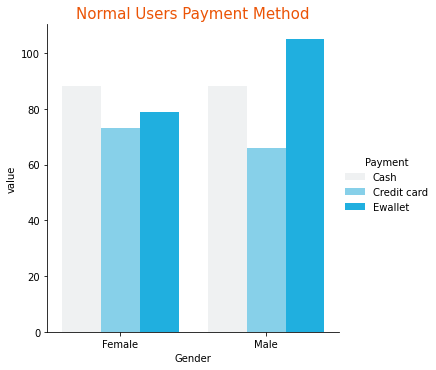

In [23]:
sns.catplot( 
           x = 'Gender',
           y = 'value',
           hue = 'Payment',
            kind = 'bar',
            color = '#00BFFF',
           data = df_normal)
plt.title('Normal Users Payment Method' , color = '#EB5406', fontsize = 15)
plt.show()

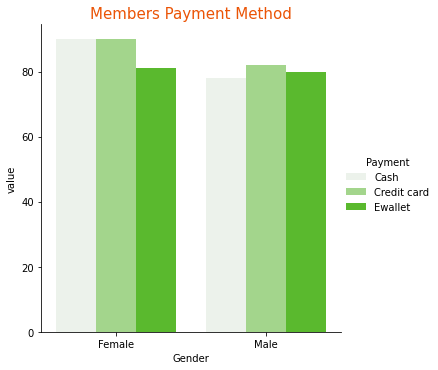

In [24]:
sns.catplot(x = 'Gender',
           y = 'value',
           hue = 'Payment',
            kind = 'bar',
            color = '#52D017',
           data = df_member)
plt.title('Members Payment Method' , color = '#EB5406', fontsize = 15)
plt.show()

## From the above analysis in the sample dataset,
    1. Branch C is getting good Income compared to other branches
    2. Each Month any one branch is getting high income than others, there is no repeitative branch which is getting first place in monthly income
    3. Electronics items were sold highly in all the branches, next to it is food and beverages.
    4. There are more females have memberships than mens
    5. In Normal users,
            a. Males paying mostly using Ewallet
            b. Females using Cash
    6. In Member users,
            a. Males prefer credit card payment
            b. Females prefer cash and credit card both